<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Evaluaci%C3%B3n%202/Evaluci%C3%B3n_2_Marcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 


In [2]:
#Importar librarías 
import numpy as np
import scipy.linalg as la
from scipy import integrate, linalg
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

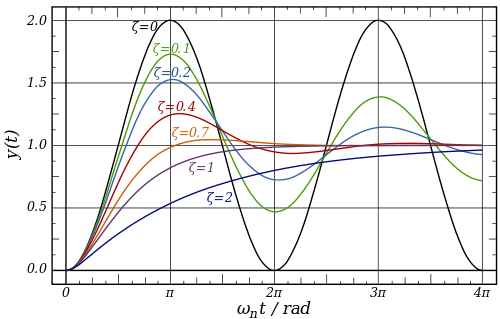

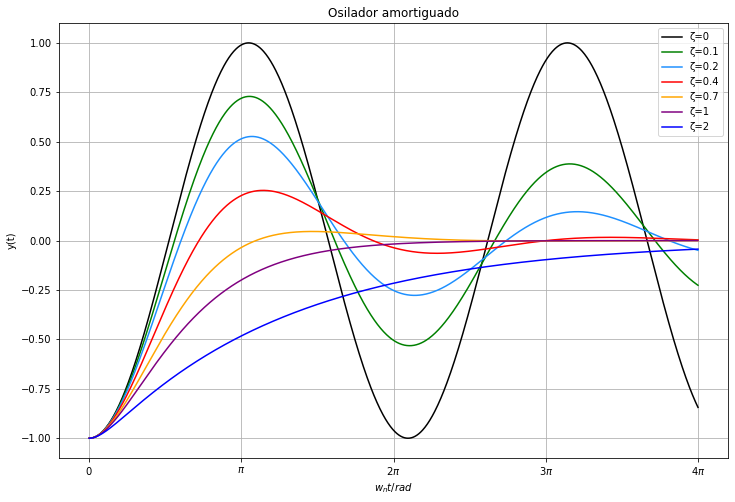

In [10]:
#Definir las constantes 
ζ=[0,0.1,0.2,0.4,0.7,1,2]
k=9.0
m=1.0
wn=3.0

#Definir una función para resolver la ecuación 
def f(y, t, ζ, wn):
    x, x1 = y
    x2 = -(wn**2)*x-2*wn*ζ*x1
    return [x1, x2]

#Definir tiempo y numero de pasos 
tinicial=0
tfinal=4
t=np.linspace(tinicial,tfinal,1000)
#Crar una lista con los colores de cada linea 
colors=['k','g','dodgerblue','r','orange','purple','blue']
# Condiciones iniciales
t0=0
y0=[-1.,0.]

#Imprimir una grafica usando un ciclo for que resuelve en cada 
plt.figure(figsize=(12,8))
# Se soluciona y grafica para cada tasa
for ta,co in zip(ζ,colors):
  sol=odeint(f,y0,t,args=(ta,wn))
  plt.plot(t, sol[:,0],color=co, label='ζ='+str(ta))
  plt.grid()
  plt.title("Osilador amortiguado")
  plt.xlabel('$w_n t/rad$')
  plt.ylabel('y(t)')
  plt.xticks([0, 1, 2,3,4],[r'$0$', r'$\pi$', r'$2\pi$',r'$3\pi$',r'$4\pi$'])
  #pl.ylim(C.min() * 1.1, C.max() * 1.1)
  #pl.yticks([-1, +1],[r'$-1$', r'$+1$'])
  plt.legend()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

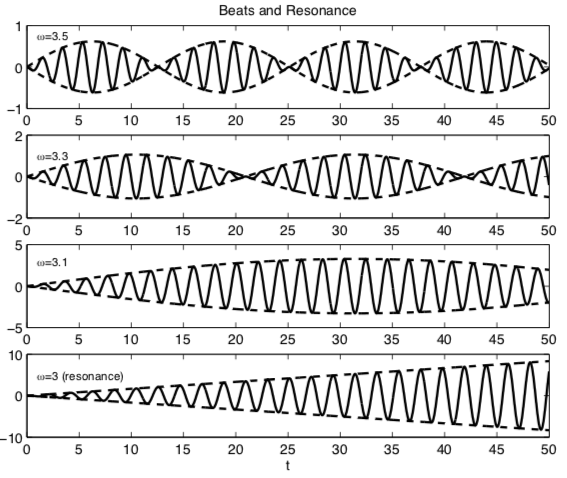

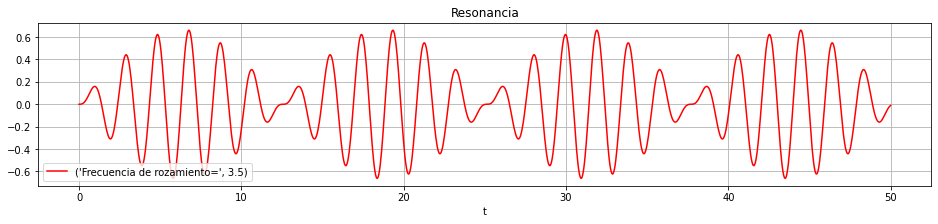

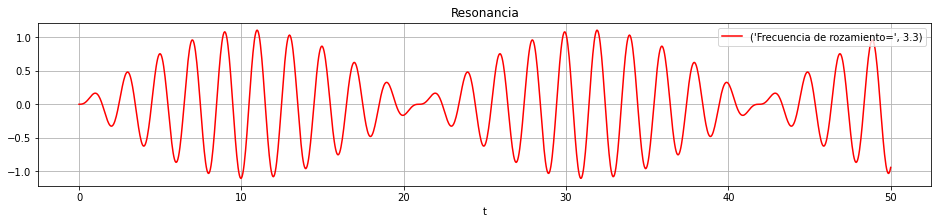

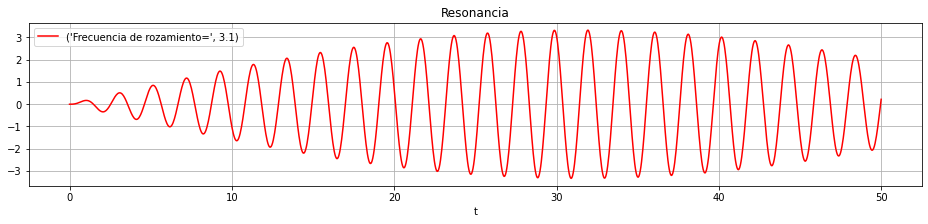

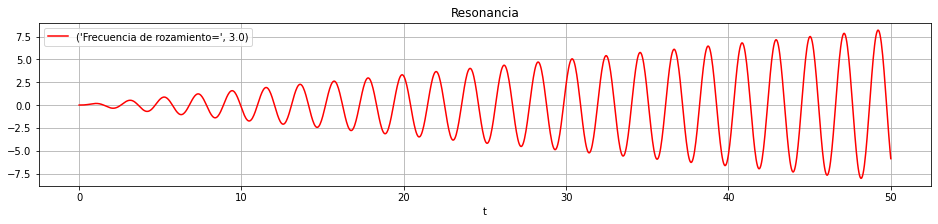

In [27]:
def f(y,t,w,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-x*wn**2]
  return dydt


#Definir las condciones inciales 
y0 = [0.0,0.0]#x(0)=0, v(0)=0

# Tiempo de integración de 0 a 50 s, con 1200 pasos 
ti=0
tf=50
t = np.linspace(ti, tf, 1200)
abserr = 1.0e-8
relerr = 1.0e-6

#Constantes 
m = 1
k = 9
F0 = 1
wn = np.sqrt(k/m)
frecuencias = [3.5,3.3,3.1,3.0]


for w in frecuencias:
  # Usar integración por scipy.integrate.odeint
  y = odeint(f, y0, t, args=(w,m,F0,wn), atol=abserr, rtol=relerr)

  #graficar 
  plt.figure(figsize=(16,3))
  plt.plot( t, y[:, 0], 'darkturquoise',color="red",label=('Frecuencia de rozamiento=',w))

  plt.legend(loc='best')
  plt.title('Resonancia')
  plt.xlabel('t') 
  plt.grid()
  plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



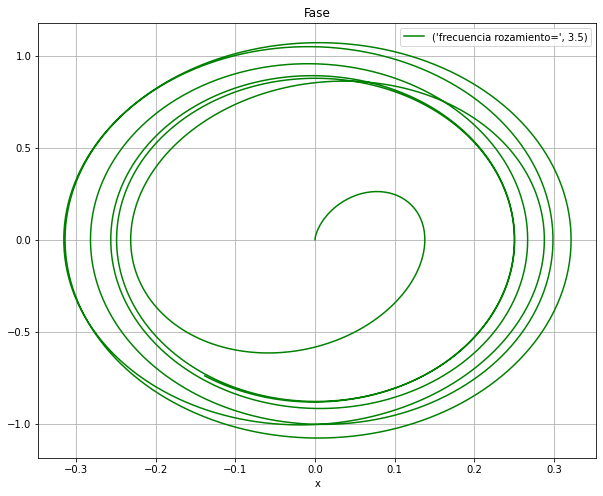

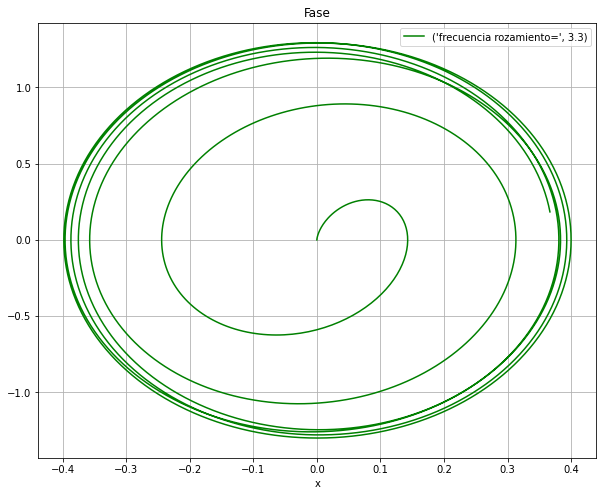

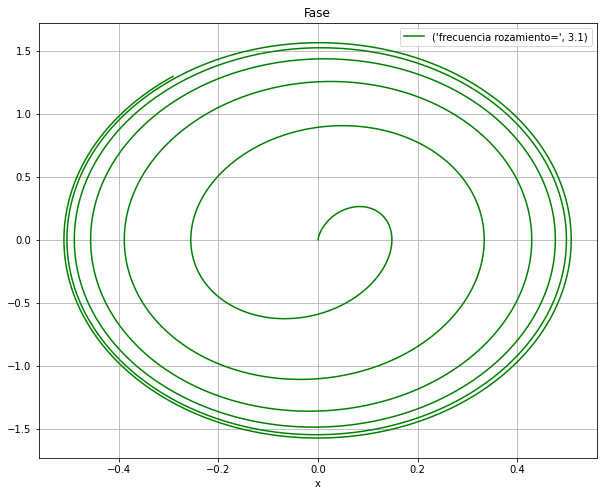

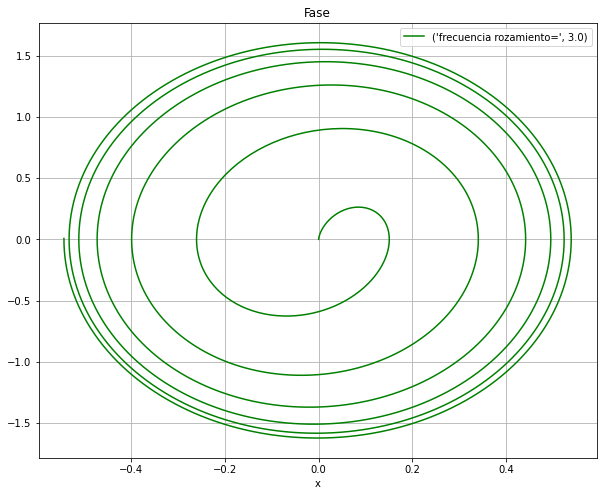

In [35]:
def f(y,t,w,zeta,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-2*zeta*wn*v-x*wn**2]
  return dydt

#Condiciones iniciales 
y0 = [0.0,0.0]#[x(0)=0, v(0)=0]
#Constantes 
k = 9
m = 1
wn = np.sqrt(k/m)
F0 = 1
z = 0.1

# Tiempo de integración de 0 a 50 s con 1200 pasos  
tf = 4*np.pi
t = np.linspace(ti, tf, 1200)

#Permtividad de error
abserr = 1.0e-8
relerr = 1.0e-6



#Ciclo for para hacer varias graficas 
for w in frecuencias:
  # integración por scipy.integrate.odeint
  y = odeint(f, y0, t, args=(w,z,m,F0,wn), atol=abserr, rtol=relerr)

 # Graficar 
  plt.figure(figsize=(10,8))
  plt.plot( y[:,0], y[:, 1], color='green', label=('frecuencia rozamiento=',w))
  plt.legend(loc='best')
  plt.title('Fase')
  plt.xlabel('x') 
  plt.grid()

plt.show()

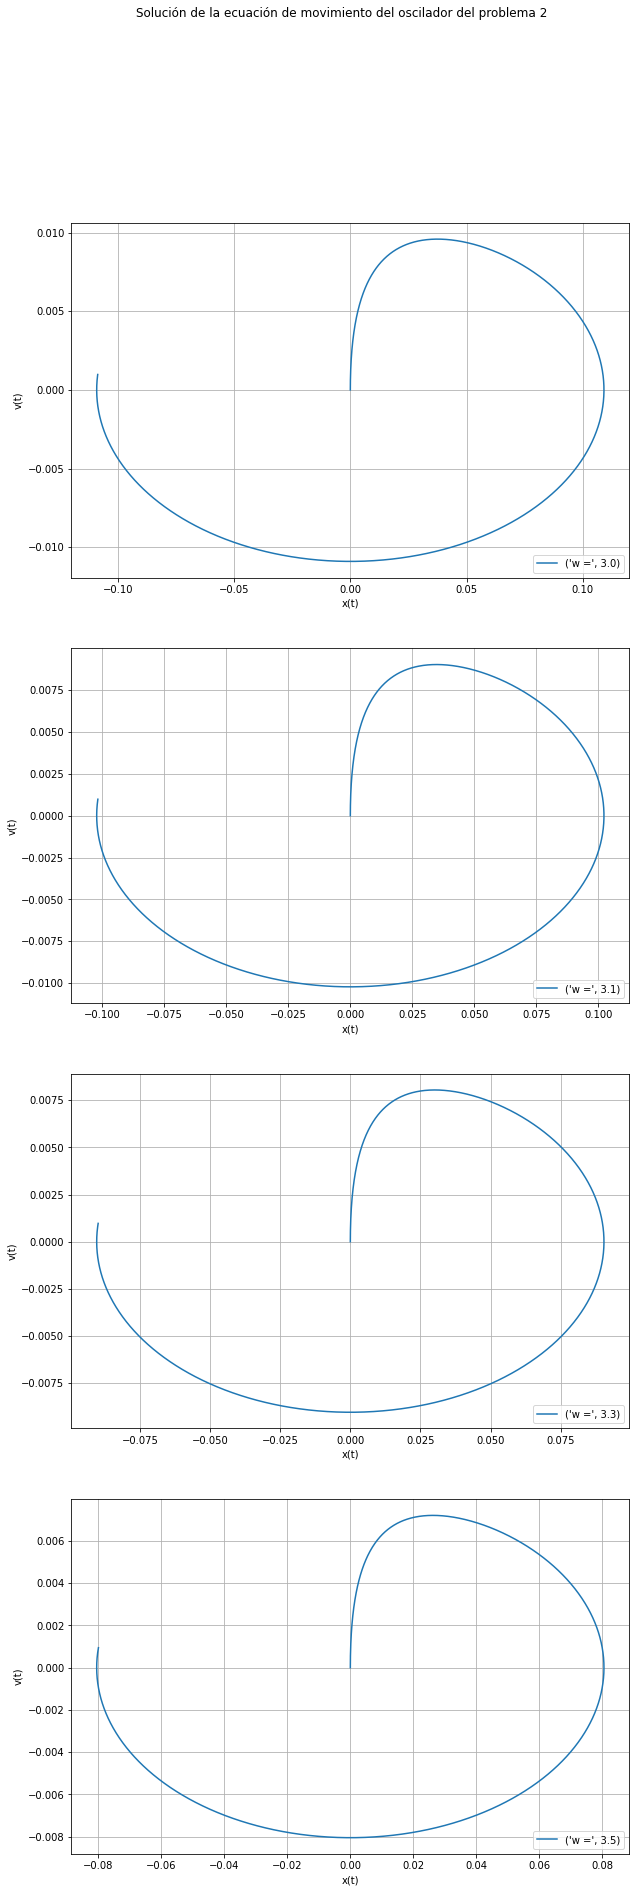

In [29]:
def Ej3(y,t,w,zeta,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-2*zeta*wn*v-x*wn**2]
  return dydt
# Tolerancia de errores  para la solución
abserr = 1.0e-8
relerr = 1.0e-6

#Definir coeficientes
w = 3 
m = 1
z = 0.1
w_n = np.sqrt(9)
F_0 = 1

# Condiciones iniciales 
t_0 = 0.0
y_0 = [0.0, 0.0] #[x_0, v_0] 

#Definir intervalo de tiempo y pasos 
ti=0
tf=50
pasos=3000
t = np.linspace(ti,tf,pasos)

#Graficar 
splt = 411

plt.figure(figsize=(10, 30))
for w in 3.0,3.1,3.3,3.5:
  y = odeint(Ej3, y_0, t, args=(z,w_n,F_0,m,w), atol=abserr, rtol=relerr)
  plt.subplot(splt)
  plt.plot(y[:,0], y[:,1], label=("w =", w))
  plt.plot(label=("w =", w))
  plt.legend(loc='lower right')
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  splt=splt+1

plt.suptitle('Solución de la ecuación de movimiento del oscilador del problema 2')
plt.show()